## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.23.4
numpy   version = 1.15.4
seaborn version = 0.9.0


example: https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [3]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv'
df=pd.read_csv(url)
# df=pd.read_csv(url, nrows=16)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


In [4]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


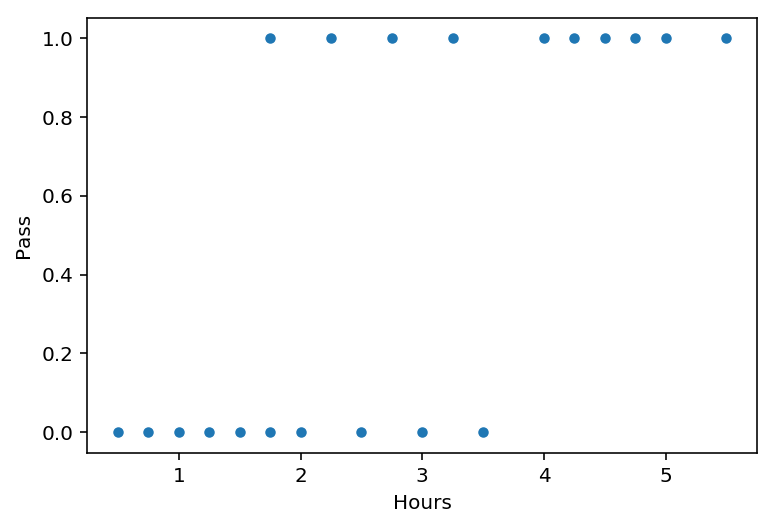

In [5]:
sns.scatterplot(data=df, x='Hours', y='Pass')

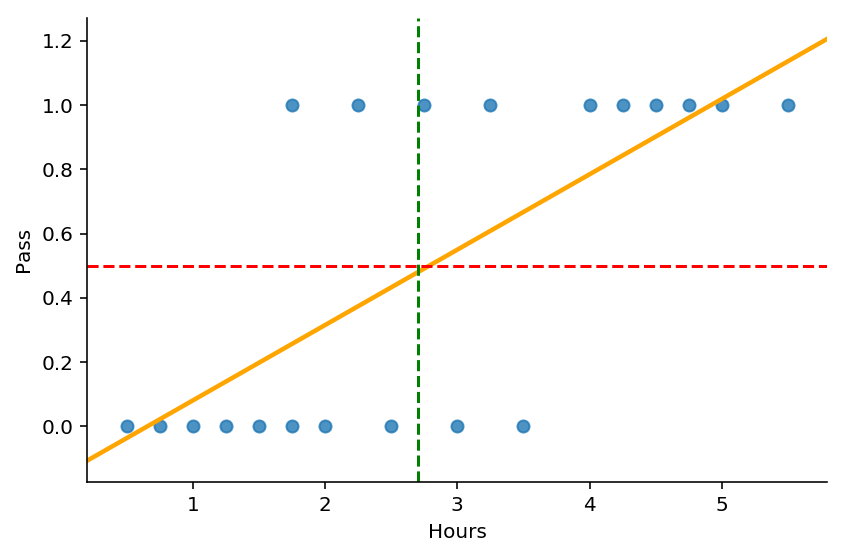

In [8]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color': 'orange'})
plt.axhline(.5, color='red', linestyle='--')
plt.axvline(2.7, color='green', linestyle='--');


In [11]:
df.at[19, 'Hours']=200
# df.at[19, 'Hours']=5.5 # original data

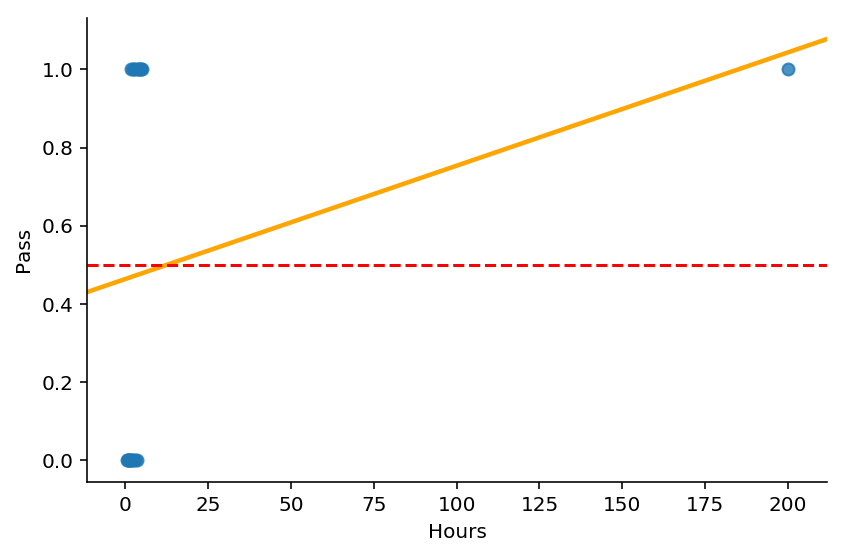

In [12]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color': 'orange'})
plt.axhline(.5, color='red', linestyle='--');

In [13]:
# df.at[19, 'Hours']=100
df.at[19, 'Hours']=5.5 # original data

/Users/prasert/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/prasert/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


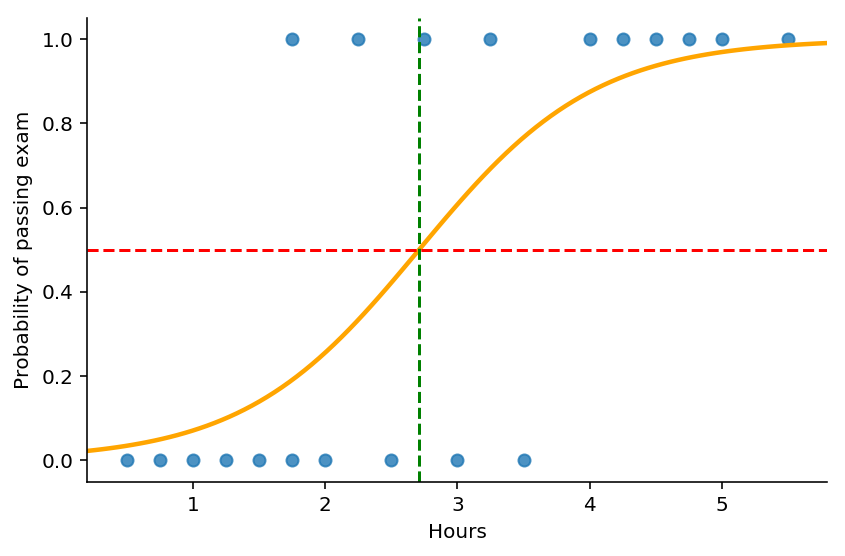

In [14]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

In [15]:
df.at[19, 'Hours']=100
# df.at[19, 'Hours']=5.5 # original data

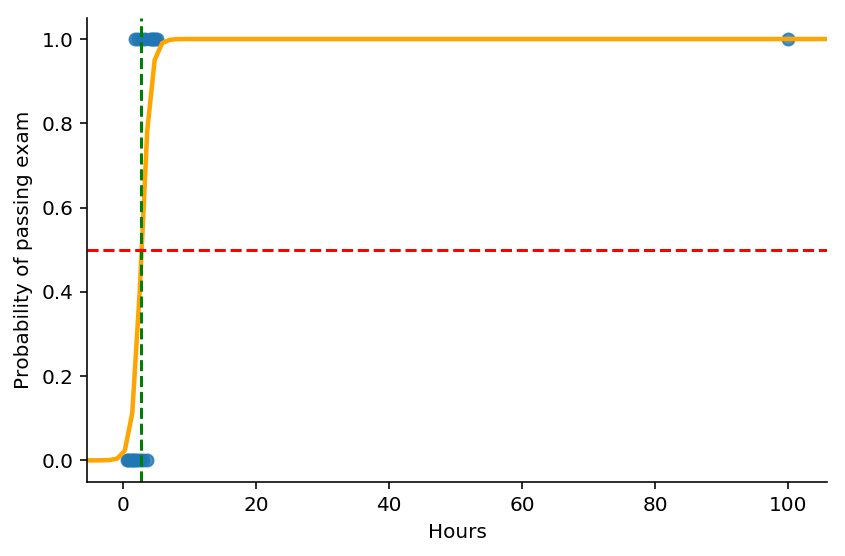

In [16]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

In [17]:
df.at[19, 'Hours']=5.5 # original data
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


## statsmodels

In [18]:
from patsy import dmatrices
import statsmodels.api as sm

In [19]:
y, X = dmatrices('Pass ~ Hours', data=df, return_type = 'dataframe') # with Intercept column
# y, X = dmatrices('Pass ~ Hours - 1', df, return_type = 'dataframe') # no Intercept column

In [20]:
X.head()

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [21]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## model_a (with intercept)

In [22]:
model_a = sm.Logit(y, X).fit()
model_a.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Feb 2019   Pseudo R-squ.:                  0.4208
Time:                        09:07:25   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
Hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [23]:
model_a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.421     
Dependent Variable: Pass             AIC:              20.0598   
Date:               2019-02-22 09:08 BIC:              22.0512   
No. Observations:   20               Log-Likelihood:   -8.0299   
Df Model:           1                LL-Null:          -13.863   
Df Residuals:       18               LLR p-value:      0.00063648
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
Hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

In [24]:
model_a.predict([[1, 2], 
                 [1, 4]])

array([0.25570318, 0.8744475 ])

In [25]:
model_a.predict(X)

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

In [26]:
model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [27]:
model_a.params

Intercept   -4.077713
Hours        1.504645
dtype: float64

In [28]:
model_a.params['Intercept']

-4.077713431087631

In [29]:
model_a.params[0]

-4.077713431087631

In [30]:
model_a.params['Hours']

1.5046454283733333

In [31]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [32]:
df['predicted']=model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)
df

,Hours,Pass,predicted
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [33]:
df['log_odds']=model_a.params['Intercept']+model_a.params['Hours']*df['Hours']
df['odds']=np.exp(model_a.params['Intercept']+model_a.params['Hours']*df['Hours'])
df['prob']=model_a.predict(X)
df

,Hours,Pass,predicted,log_odds,odds,prob
0,0.50,0,0,-3.325391,0.035958,0.034710
1,0.75,0,0,-2.949229,0.052380,0.049773
2,1.00,0,0,-2.573068,0.076301,0.070892
3,1.25,0,0,-2.196907,0.111146,0.100029
4,1.50,0,0,-1.820745,0.161905,0.139344
5,1.75,0,0,-1.444584,0.235844,0.190837
6,1.75,1,0,-1.444584,0.235844,0.190837
7,2.00,0,0,-1.068423,0.343550,0.255703
8,2.25,1,0,-0.692261,0.500443,0.333530
9,2.50,0,0,-0.316100,0.728987,0.421627


## statsmodels: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

In [34]:
model_a.pred_table()

array([[8., 2.],
       [2., 8.]])

In [35]:
tn, fp, fn, tp = model_a.pred_table().ravel()

In [36]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 8.0
fp = 2.0
fn = 2.0
tp = 8.0


$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

In [37]:
(tp+tn)/(tp+tn+fp+fn)

0.8

## Visualize

In [38]:
import math

$$f(x)={\frac {1}{1+e^{-x}}}$$

In [39]:
def sg(intercept, coef, x):
    ex = math.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

In [40]:
def sp(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1 / (1 + ex))

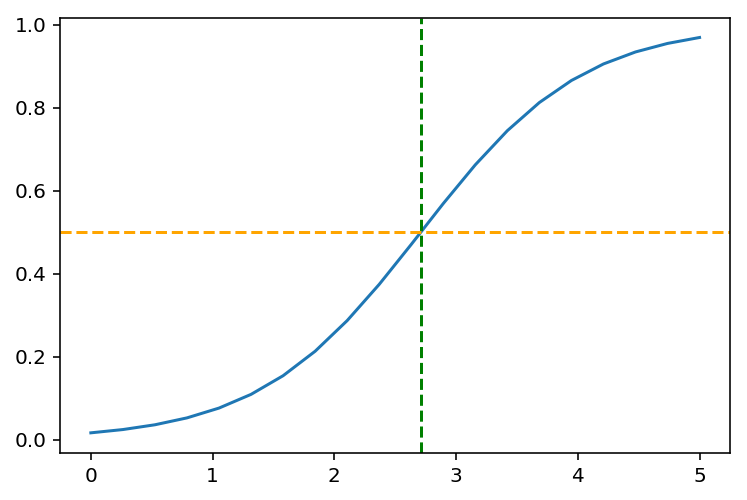

In [41]:
xp=np.linspace(0,5,20)
yp=sp(model_a.params[0], model_a.params[1], xp)
plt.plot(xp, yp)
plt.axhline(.5, color='orange', linestyle='--')
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']), 
            color='green', linestyle='--')

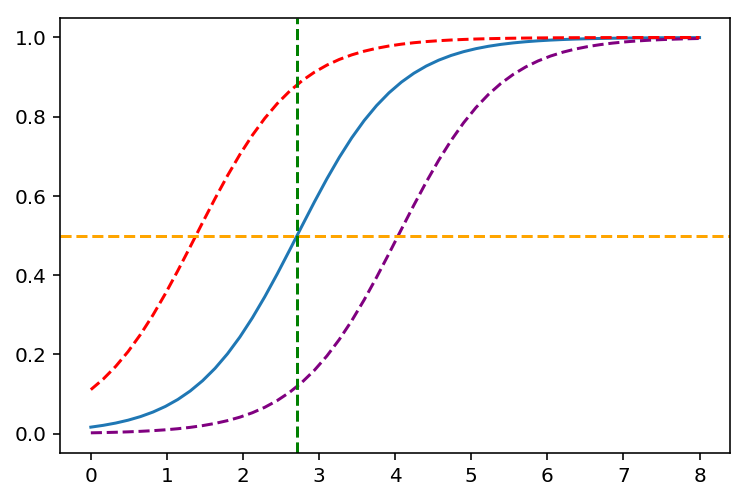

In [45]:
xp=np.linspace(0,8,50)
yp=sp(model_a.params[0], model_a.params[1], xp)
yp2=sp(model_a.params[0], model_a.params[1]+.4, xp)
yp3=sp(model_a.params[0], model_a.params[1]-.4, xp)
yp4=sp(model_a.params[0]-2, model_a.params[1], xp)
yp5=sp(model_a.params[0]+2, model_a.params[1], xp)

plt.plot(xp, yp)
# plt.plot(xp, yp2, color='.8', linestyle='--')
# plt.plot(xp, yp3, color='salmon', linestyle='--')
plt.plot(xp, yp4, color='purple', linestyle='--')
plt.plot(xp, yp5, color='red', linestyle='--')

plt.axhline(.5, color='orange', linestyle='--')
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']), 
            color='green', linestyle='--')

## model_b (no intercept -- DON'T ANALYSE THIS WAY)

In [46]:
y_b, X_b = dmatrices('Pass ~ Hours - 1', df, return_type = 'dataframe') # no Intercept column

In [47]:
X_b

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [48]:
y_b

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [49]:
model_b = sm.Logit(y_b, X_b).fit()
model_b.summary()

Optimization terminated successfully.
         Current function value: 0.639808
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Fri, 22 Feb 2019   Pseudo R-squ.:                 0.07695
Time:                        09:23:24   Log-Likelihood:                -12.796
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          0.2179      0.157      1.390      0.165      -0.089       0.525
==============================================================================
"""

In [50]:
model_b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.077  
Dependent Variable: Pass             AIC:              27.5923
Date:               2019-02-22 09:23 BIC:              28.5881
No. Observations:   20               Log-Likelihood:   -12.796
Df Model:           0                LL-Null:          -13.863
Df Residuals:       19               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Hours     0.2179     0.1568   1.3900   0.1645   -0.0894   0.5253
==============================================================

"""

In [51]:
model_b.pred_table()

array([[ 0., 10.],
       [ 0., 10.]])